In [1]:
from detection_pipeline import *
from initial_quality_project import *
from blurred_auto import *
import pandas as pd
from xml_files import *
from visualization import *


In [2]:
# DO THIS -------------------------------------------------------------------------------------------------

# Provide the project folder paths
hs = "/home/asoria/Documents/proyecto_bretagne/port_kerity/"

folder_path = "/home/asoria/Documents/proyecto_bretagne/port_kerity/sample_original_images/"
store_summary_dict = r'/home/asoria/Documents/proyecto_bretagne/port_kerity/summary_project.csv'

# UNTIL HERE ------------------------------------------------------------------------------------------------

In [3]:
# Create and empty dictionary for all the and results, create list of quality parameters
summary_dict = {}
params_images = ['modeHue', 'medianSat', 'medianVal', 'avgLy', 'varLy', 'skewness', 'kurtosis', 'asg', 'sobel', 'hough', 'modaLBP', 'entropy']
summary_dict['folder_name'] = folder_path

Initial folder checks
Folder exists: True , and there are 79 images of resolution: 1080 px, 1440 px and 3 BGR color spaces.


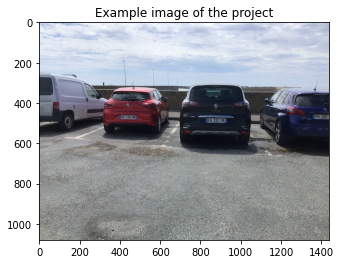

In [4]:
# Initial checks to see the state of the folder
print('Initial folder checks')
f_exists, isempty, n_images, shape_images, all_images = initial_checks_func(folder_path)

summary_dict['n_imgs'] = n_images
summary_dict['before'] = {}
summary_dict['before']['inputs'] = {}
summary_dict['before']['inputs']['images'] = {}


Project quality checks


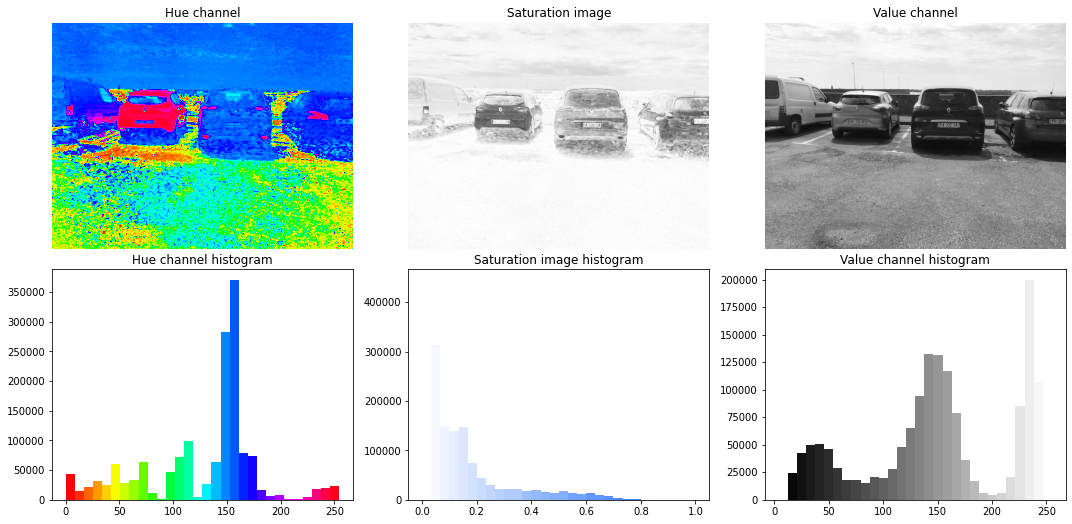

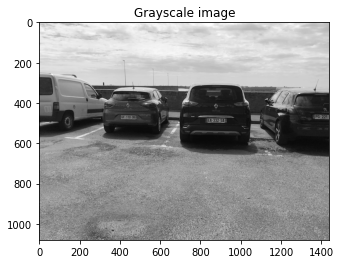

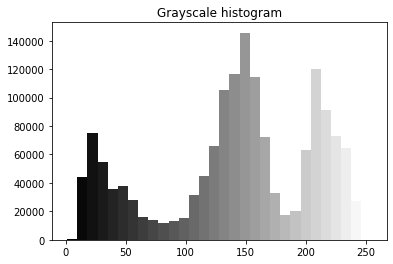

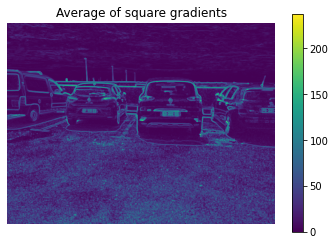

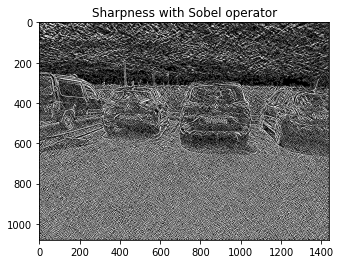

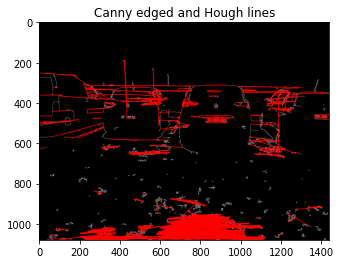

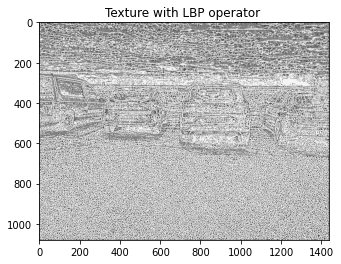

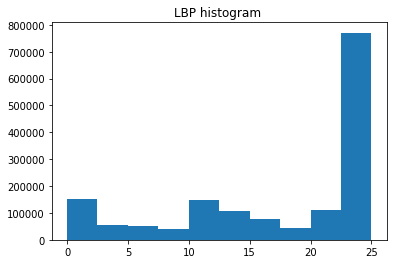

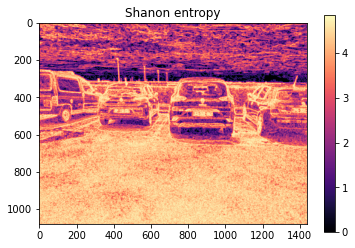

Mode hue = 152.625 , Median sat = 0.07024793388429751 , Median value = 151.0
Exp of average of log grayscale = 118.30065056351857 , Exp of variance of log grayscale: 1.7128716393627166
Skewness = -0.4899301087233068 , Kurtosis: -0.7108961394242206
Average of square gradients =  6.883818315182028
Sobel value =  95.19130979938272
Hough transform: n° lines =  371
Mode of LBP =  25
Entropy =  3.745406425938248


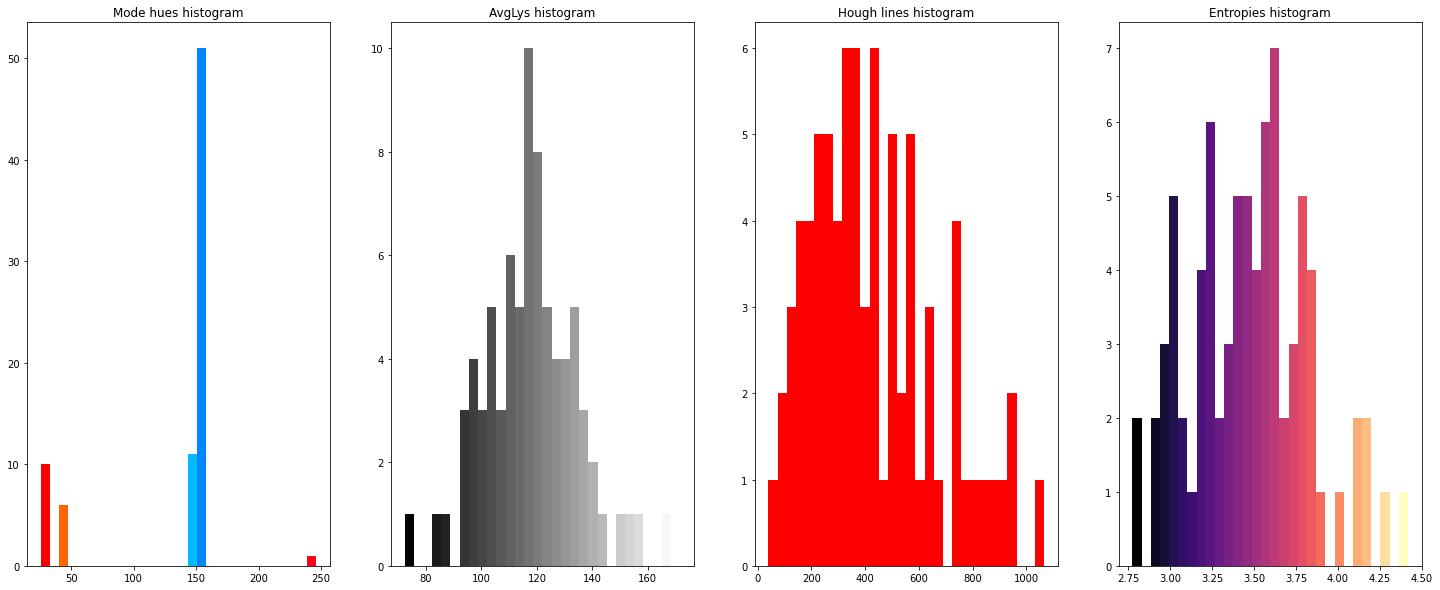

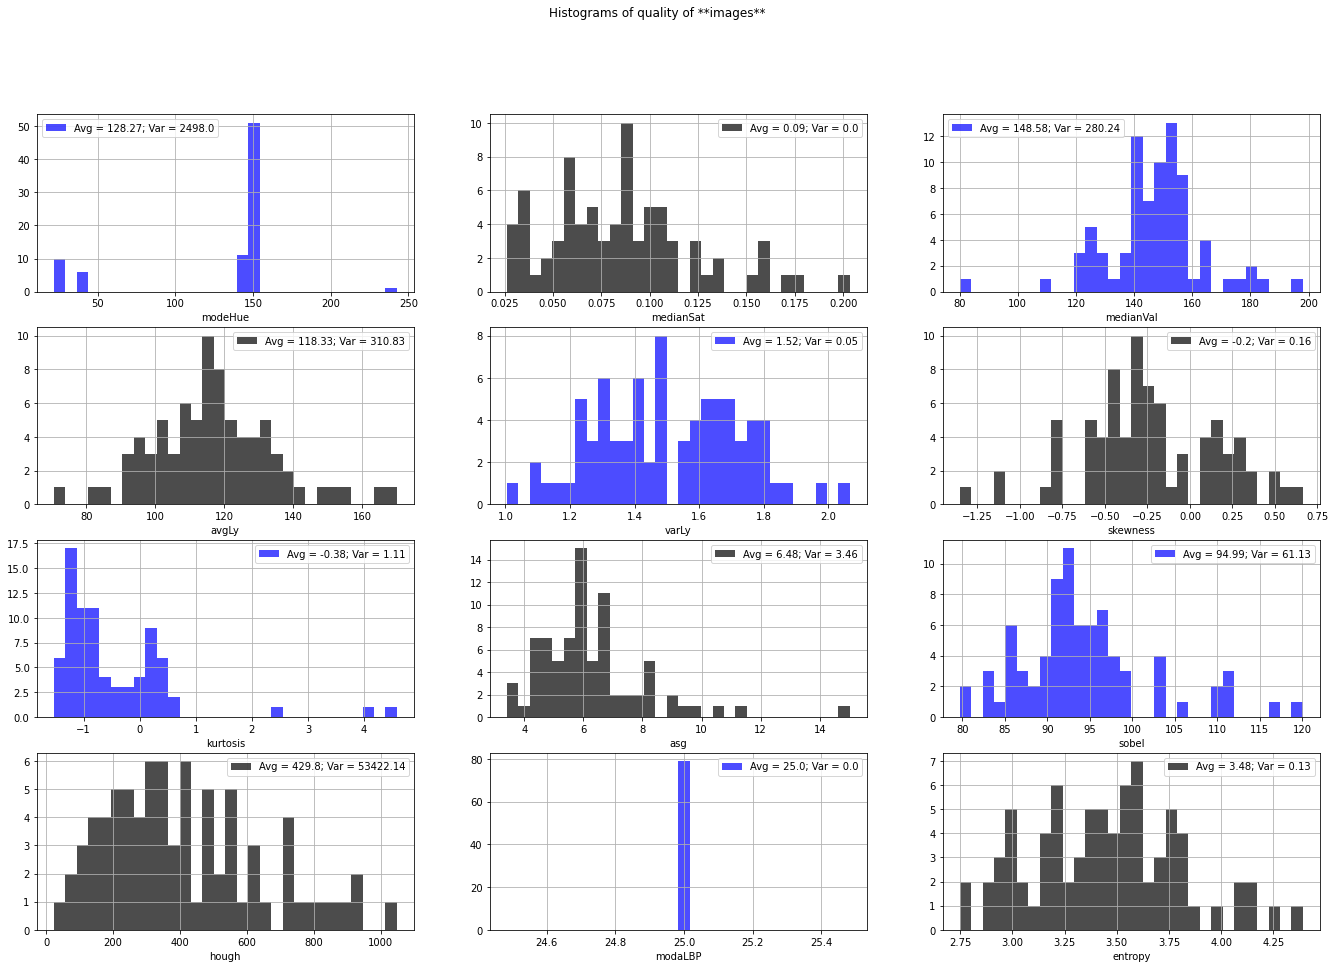

In [5]:
# Quality checks for each image in the project
print('Project quality checks')
(varmodeHue, varavgLys, varHough, varEntropy, img_chars) = project_description(folder_path, all_images, False, join(hs,"hist_orig.png"))
summary_dict['before']['inputs']['varmodeHue'] = varmodeHue
summary_dict['before']['inputs']['varavgLys'] = varavgLys
summary_dict['before']['inputs']['varHough'] = varHough
summary_dict['before']['inputs']['varEntropy'] = varEntropy

for image in all_images:
    summary_dict['before']['inputs']['images'][image] = {}
    summary_dict['before']['inputs']['images'][image]['img_char'] = {}

    for n in range(len(params_images)):
        p = params_images[n]
        summary_dict['before']['inputs']['images'][image]['img_char'][p] = img_chars[image][n+3]
quality_images(summary_dict,join(hs,"img_quality.png"))

Ground truth


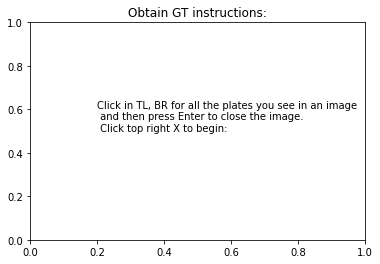

Qt: Session management error: Could not open network socket


[[330, 342]]
[[330, 342], [407, 378]]
[[330, 342], [407, 378], [617, 367]]
[[330, 342], [407, 378], [617, 367], [735, 409]]
[[400, 463]]
[[400, 463], [485, 487]]
[[400, 463], [485, 487], [826, 476]]
[[400, 463], [485, 487], [826, 476], [936, 499]]
[[400, 463], [485, 487], [826, 476], [936, 499], [1355, 456]]
[[400, 463], [485, 487], [826, 476], [936, 499], [1355, 456], [1432, 480]]
[[1254, 556]]
[[1254, 556], [1423, 629]]
[[1162, 303]]
[[1162, 303], [1218, 335]]
[[1162, 303], [1218, 335], [34, 262]]
[[1162, 303], [1218, 335], [34, 262], [114, 290]]
[[144, 457]]
[[144, 457], [255, 488]]
[[144, 457], [255, 488], [488, 488]]
[[144, 457], [255, 488], [488, 488], [565, 506]]
[[144, 457], [255, 488], [488, 488], [565, 506], [860, 464]]
[[144, 457], [255, 488], [488, 488], [565, 506], [860, 464], [937, 490]]
[[253, 429]]
[[253, 429], [360, 450]]
[[253, 429], [360, 450], [587, 457]]
[[253, 429], [360, 450], [587, 457], [666, 481]]
[[253, 429], [360, 450], [587, 457], [666, 481], [973, 438]]
[[

In [6]:
# Obtain ground truth
print('Ground truth')
image_gt_dict = obtain_gt(folder_path, all_images)

Detection algorithm


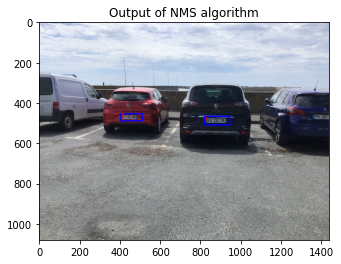

In [7]:
# Run detection algorithm
print('Detection algorithm')
image_dp_dict = obtain_automatic(all_images, folder_path)

Performance of detection algorithm


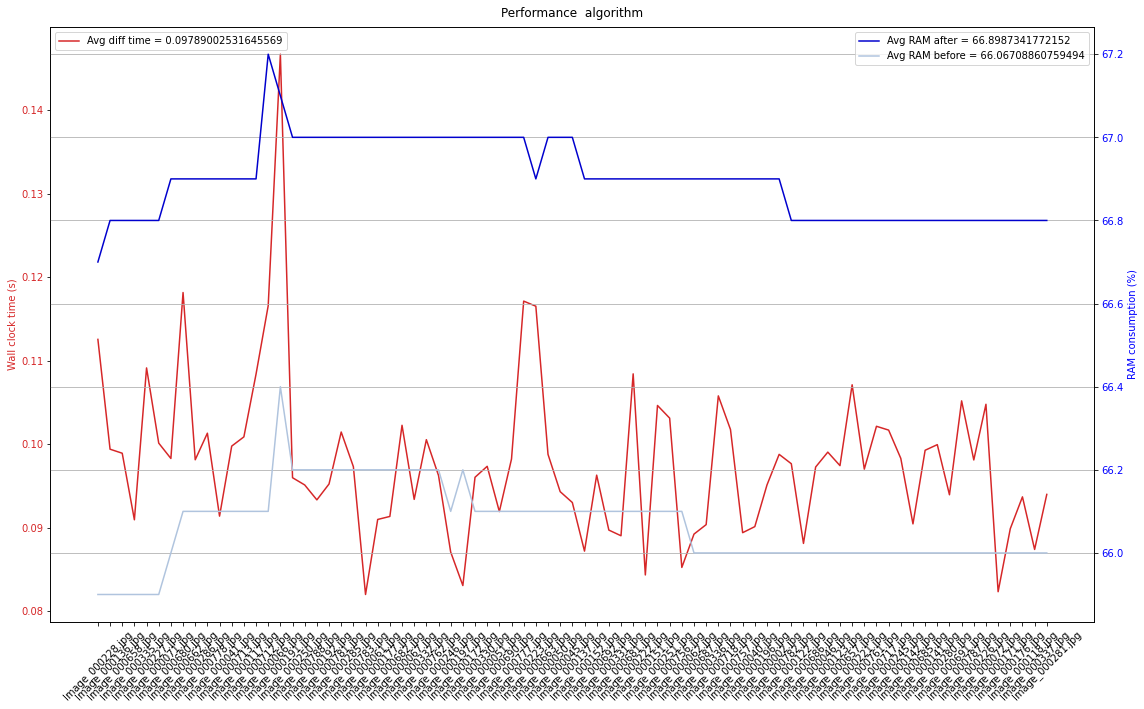

In [8]:
# Display performance of detection algorithm
print('Performance of detection algorithm')
detection_performance(image_dp_dict, show=True, name=join(hs,"det_perf.png"));

Calculate ideal parameters


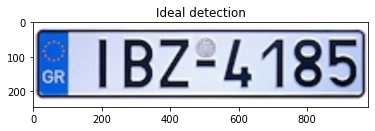

In [9]:
# Obtain the parameters for the ideal object to find
print('Calculate ideal parameters')
ideal_filename = '/home/asoria/Documents/913440_not_localized/ideal_greek_image'
ideal_params = set_baseline(ideal_filename)

In [10]:
# Filter the detections that are very different to the ideal object
print('Filter detections')
filtered_dp_dict = check_all_detections_quality(image_dp_dict, all_images, folder_path, ideal_params)
for f in all_images:
    summary_dict['before']['inputs']['images'][f]['detections'] = {}
    ndetections = len(filtered_dp_dict[f]['keep'])
    for i in range(ndetections):
        detname = 'det'+str(i+1)
        summary_dict['before']['inputs']['images'][f]['detections'][detname] = {}
        summary_dict['before']['inputs']['images'][f]['detections'][detname]['coordis'] = filtered_dp_dict[f]['keep'][i] 


        for n in range(len(params_images)):
            p = params_images[n]
            summary_dict['before']['inputs']['images'][f]['detections'][detname][p] = filtered_dp_dict[f]['unideal'][i][n+3]


Filter detections
Number of detections considered good =  62
Number of detections considered bad =  0


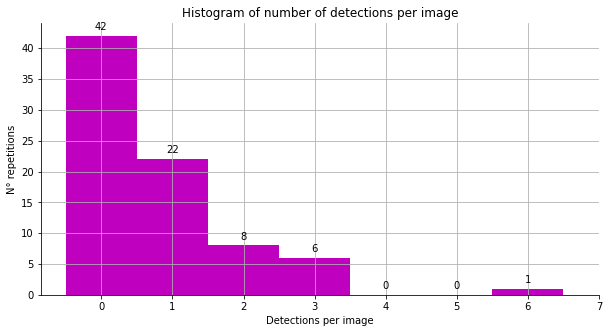

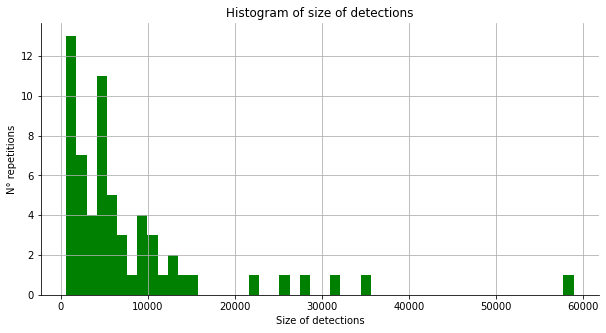

In [11]:
# Evaluate the number and size of detections
ndet_peri(summary_dict, join(hs,"ndet_peri.png"))
hist_size_det(summary_dict, join(hs, "size_det.png"))

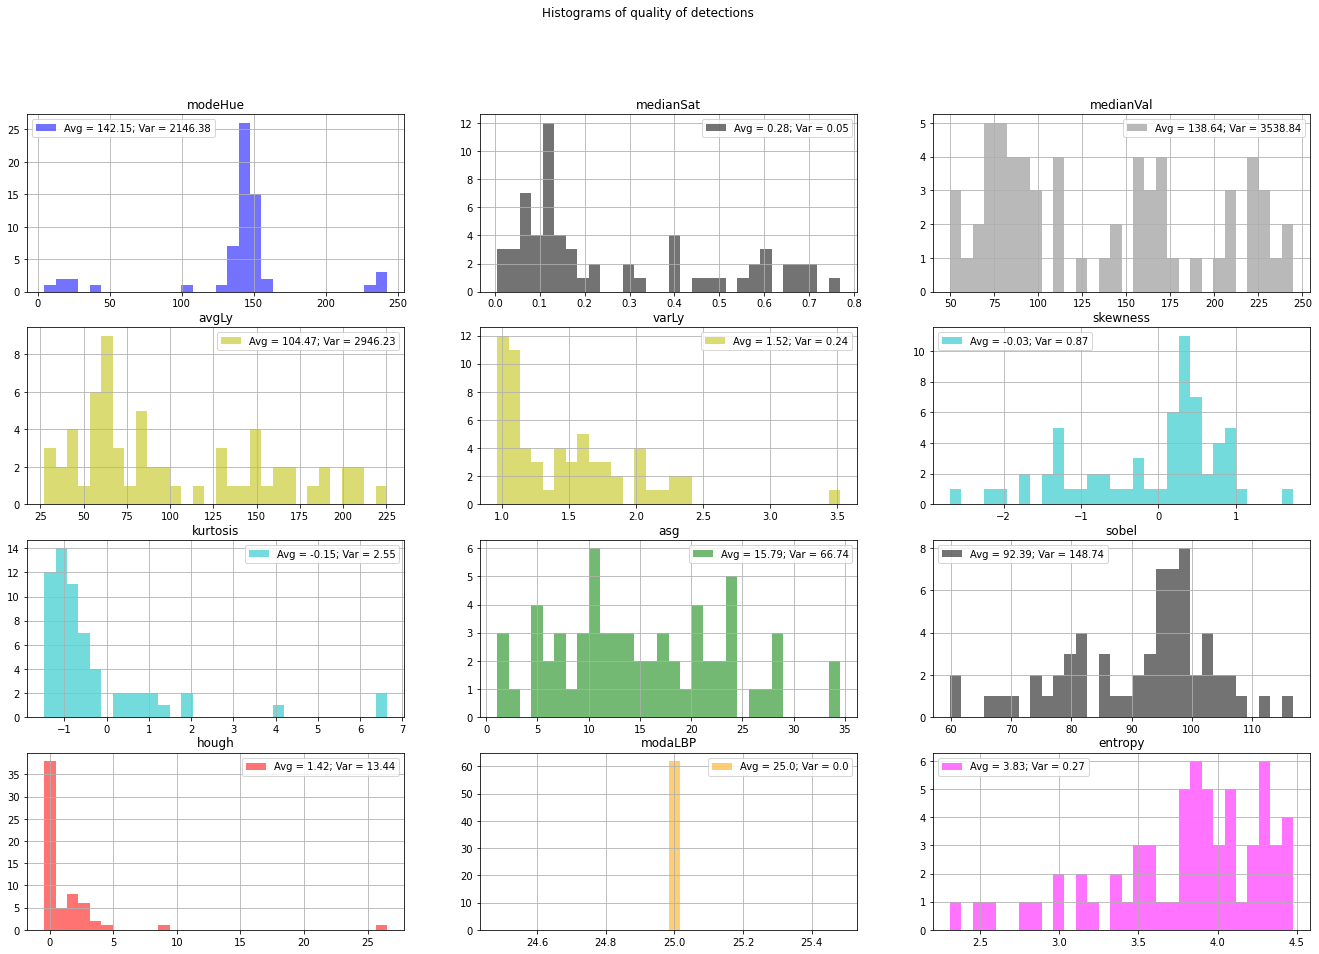

In [12]:
# Evaluate the quality of the detections
dd=histogram_detections(summary_dict, join(hs, "hist_det.png"))
dd.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

IoU calculation


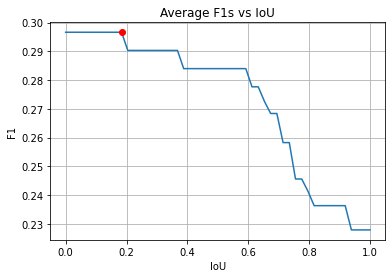

Optimum threshold =  0.18367346938775508


In [13]:
# Calculate optimum IoU for GT and DP to maximize F1 score in the project
print('IoU calculation')
th_opt = find_optim_iou(all_images, image_gt_dict, filtered_dp_dict, True, join(hs,"F1_finding.png"))
print('Optimum threshold = ',th_opt)
summary_dict['th_opt'] = th_opt

Calculate F1


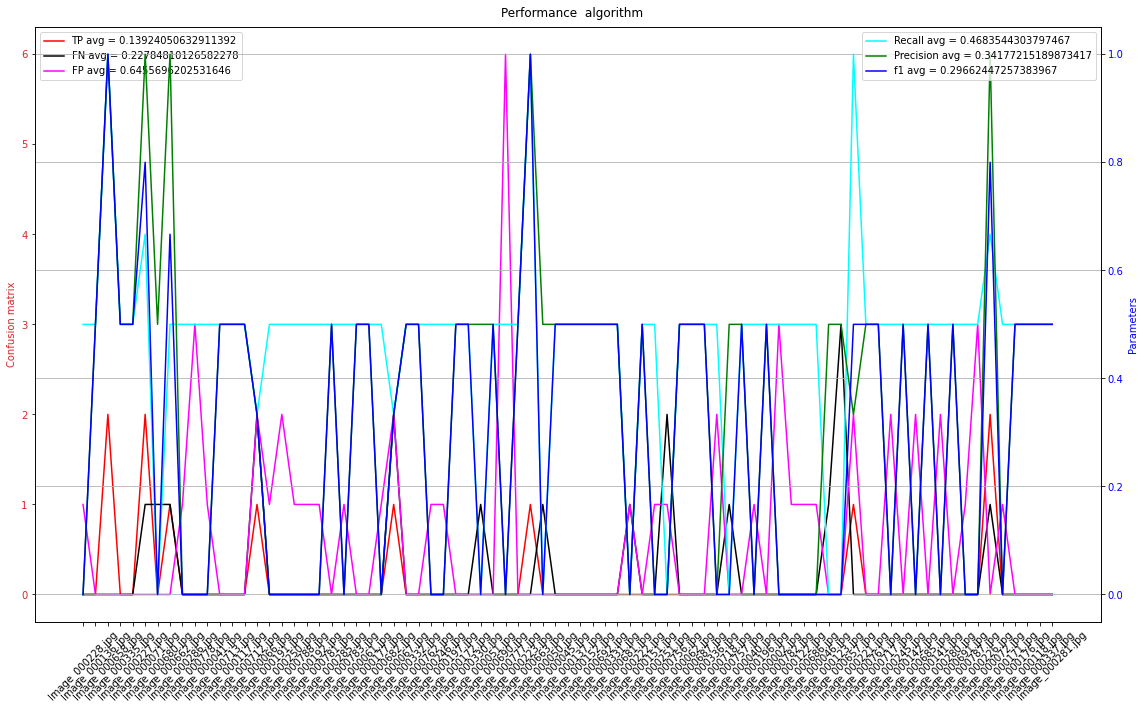

In [14]:
# Calculate F1 score for each image
print('Calculate F1')
image_f1_dict = img_eval_f1score(all_images, image_gt_dict, filtered_dp_dict, th_opt, True, join(hs,"F1.png"))
for image in all_images:
    summary_dict['before']['inputs']['images'][image]['F1'] = image_f1_dict[image]['f1']
    
# Keep the confusion values
plot_confusion_values(image_f1_dict, join(hs,"confusion_values.png"))

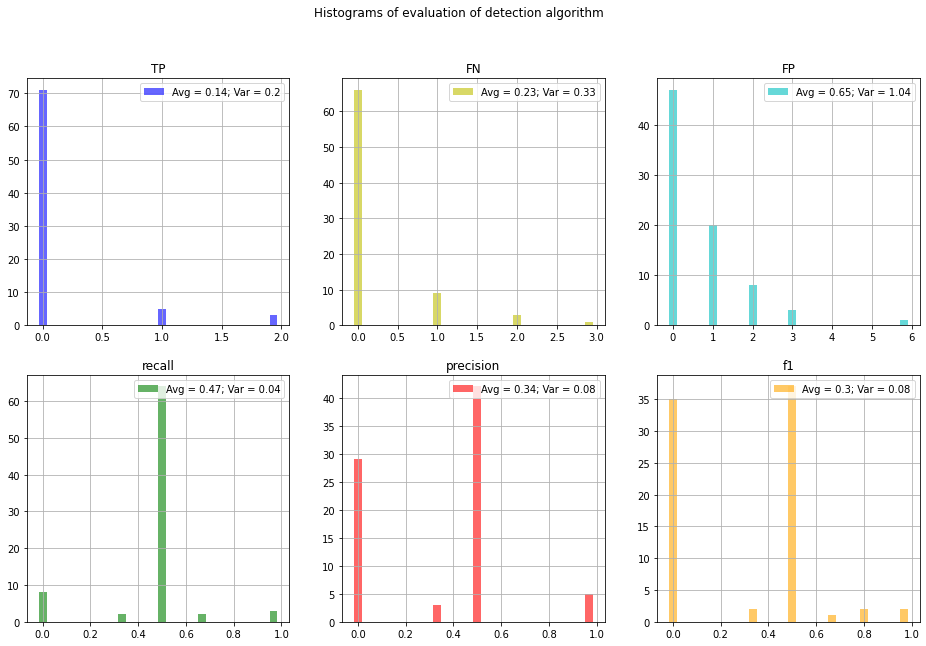

In [15]:
# Evaluate the results of detection algorithm
hist_eval_det(image_f1_dict, join(hs, "eval_det_algo.png"))

In [16]:
# Predict F1 based on the quality of the images as:
#   mod = 
# # smf.ols(formula='F1 ~ modeHue + medianSat + medianVal + 
# # avgLy + varLy + skewness + kurtosis + asg + sobel + hough + 
# # modaLBP + entropy', data=df_f1t)
   

f1_pp(summary_dict)

                            OLS Regression Results                            
Dep. Variable:                     F1   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:                    0.8971
Date:                 Fr, 17 Jun 2022   Prob (F-statistic):              0.548
Time:                        17:35:01   Log-Likelihood:                -6.4360
No. Observations:                  79   AIC:                             36.87
Df Residuals:                      67   BIC:                             65.31
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0032      0.004     -0.853      0.3

Blurring algorithm


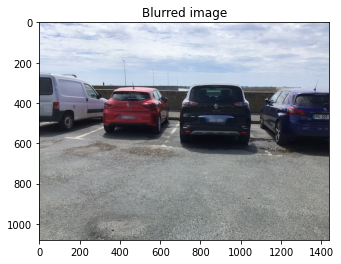

In [17]:
# Run blurring algorithm
print('Blurring algorithm')
image_blurred_dict, folder_path_out = blur_automatic(all_images, filtered_dp_dict, folder_path)
summary_dict['after'] = {}
summary_dict['after']['inputs'] = {}

Performance of blurring algorithm


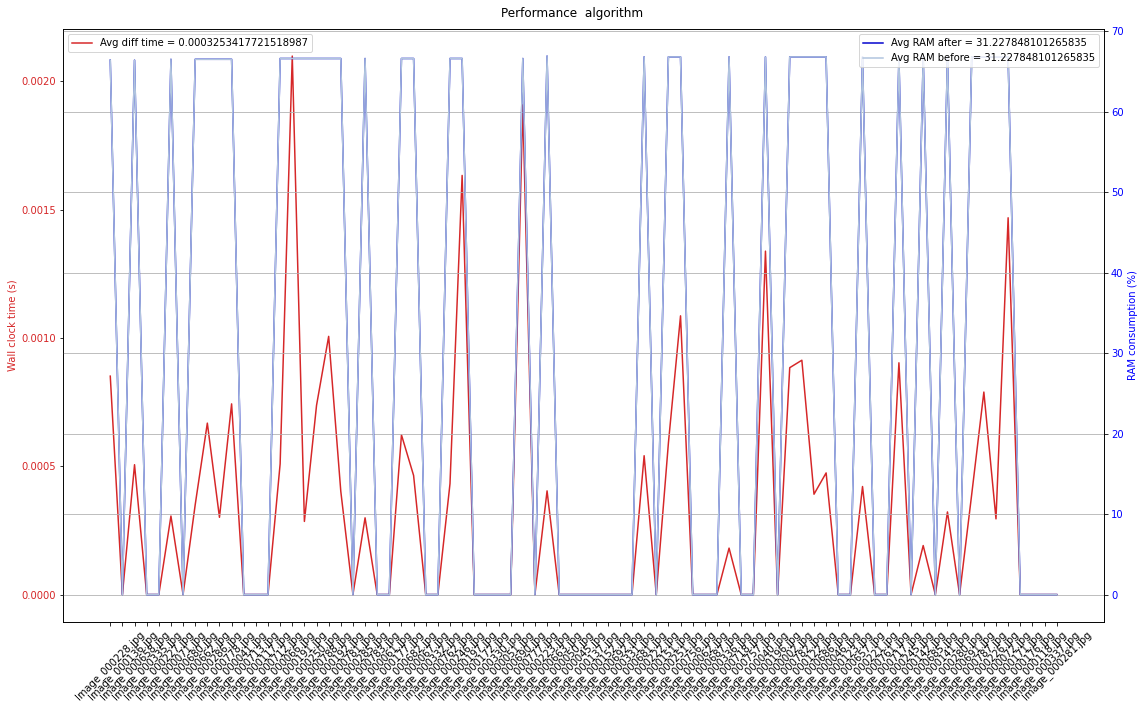

In [18]:
# Display performance of blurring algorithm
print('Performance of blurring algorithm')
detection_performance(image_blurred_dict, True, join(hs,"blur_perf.png"));

In [19]:
# Evaluation of blurred detections
print('Evaluate blurred detections')
augmented_blurred_dict = check_all_blurred_quality(image_blurred_dict, all_images, folder_path_out)

summary_dict['after']['inputs']['images'] = {}

for f in all_images:
    summary_dict['after']['inputs']['images'][f] = {}
    summary_dict['after']['inputs']['images'][f]['detections'] = {}

    ndetections = len(augmented_blurred_dict[f]['keep'])
    for i in range(ndetections):
        detname = 'det'+str(i+1)
        summary_dict['after']['inputs']['images'][f]['detections'][detname] = {}
        summary_dict['after']['inputs']['images'][f]['detections'][detname]['coordis'] = augmented_blurred_dict[f]['keep'][i]

        for n in range(len(params_images)):
            p = params_images[n]
            summary_dict['after']['inputs']['images'][f]['detections'][detname][p] = augmented_blurred_dict[f]['unideal'][i][n+3]


Evaluate blurred detections


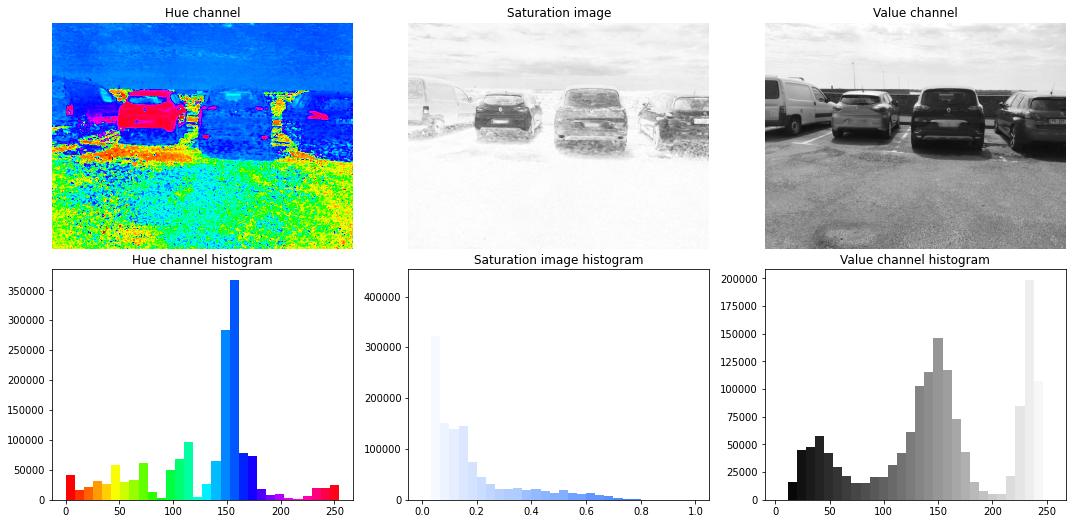

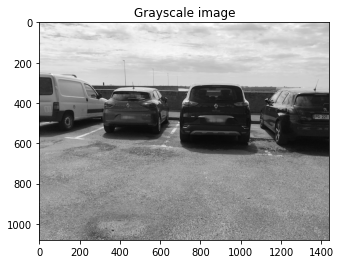

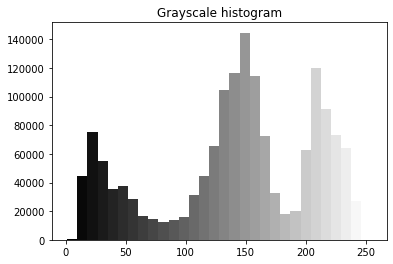

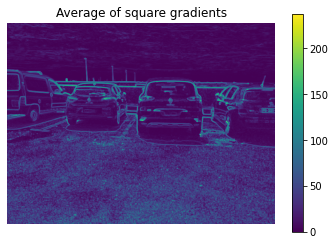

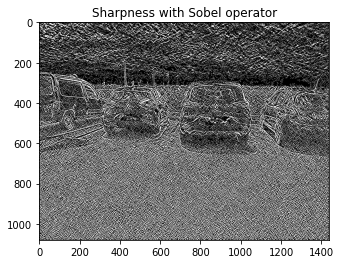

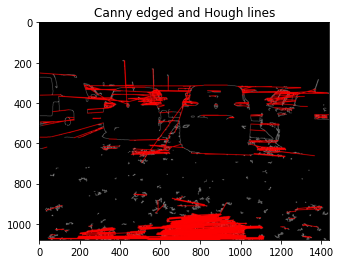

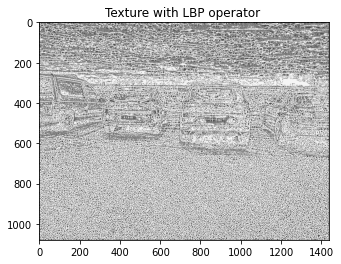

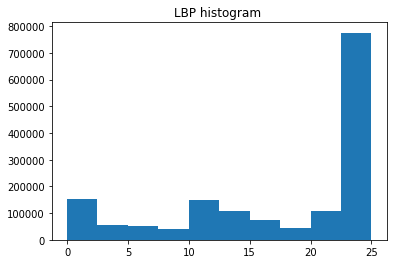

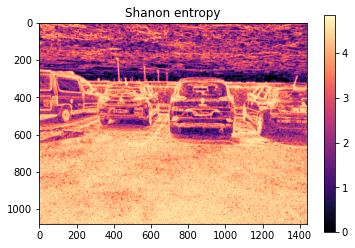

Mode hue = 152.61363636363637 , Median sat = 0.07079646017699115 , Median value = 151.0
Exp of average of log grayscale = 118.35410874219633 , Exp of variance of log grayscale: 1.7084566905234386
Skewness = -0.4869161760834734 , Kurtosis: -0.716496484039399
Average of square gradients =  6.8785609410039195
Sobel value =  95.17114197530864
Hough transform: n° lines =  387
Mode of LBP =  25
Entropy =  3.7454064259382482


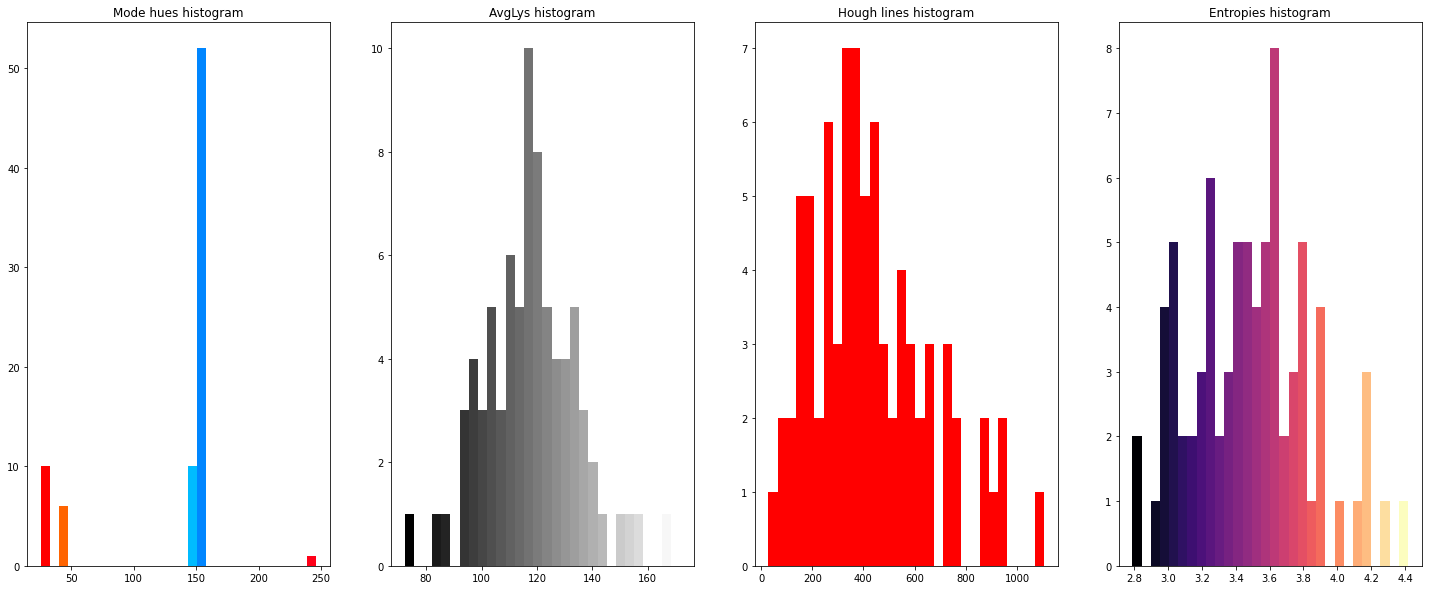

In [20]:
# Evaluation of blurred project
(varmodeHue_b, varavgLys_b, varHough_b, varEntropy_b, img_chars_b) = project_description(folder_path_out, all_images, show=False, x = join(hs,"hist_blur.png"))
summary_dict['after']['inputs']['varmodeHue'] = varmodeHue_b
summary_dict['after']['inputs']['varavgLys'] = varavgLys_b
summary_dict['after']['inputs']['varHough'] = varHough_b
summary_dict['after']['inputs']['varEntropy'] = varEntropy_b

for image in all_images:
    summary_dict['after']['inputs']['images'][image]['img_char'] = {}

    for n in range(len(params_images)):
            p = params_images[n]
            summary_dict['after']['inputs']['images'][image]['img_char'][p] = img_chars_b[image][n+3]


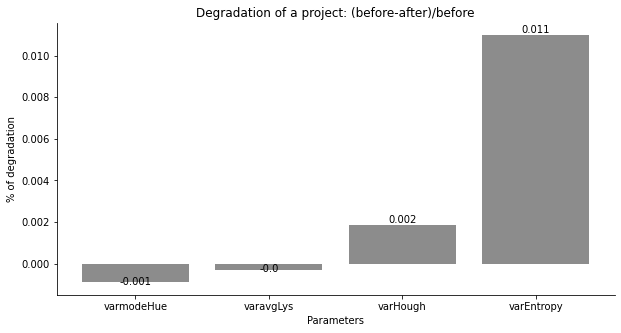

In [21]:
# Evaluate the degradation of the whole project
deg_of_project(summary_dict, join(hs, "deg_proj.png"))

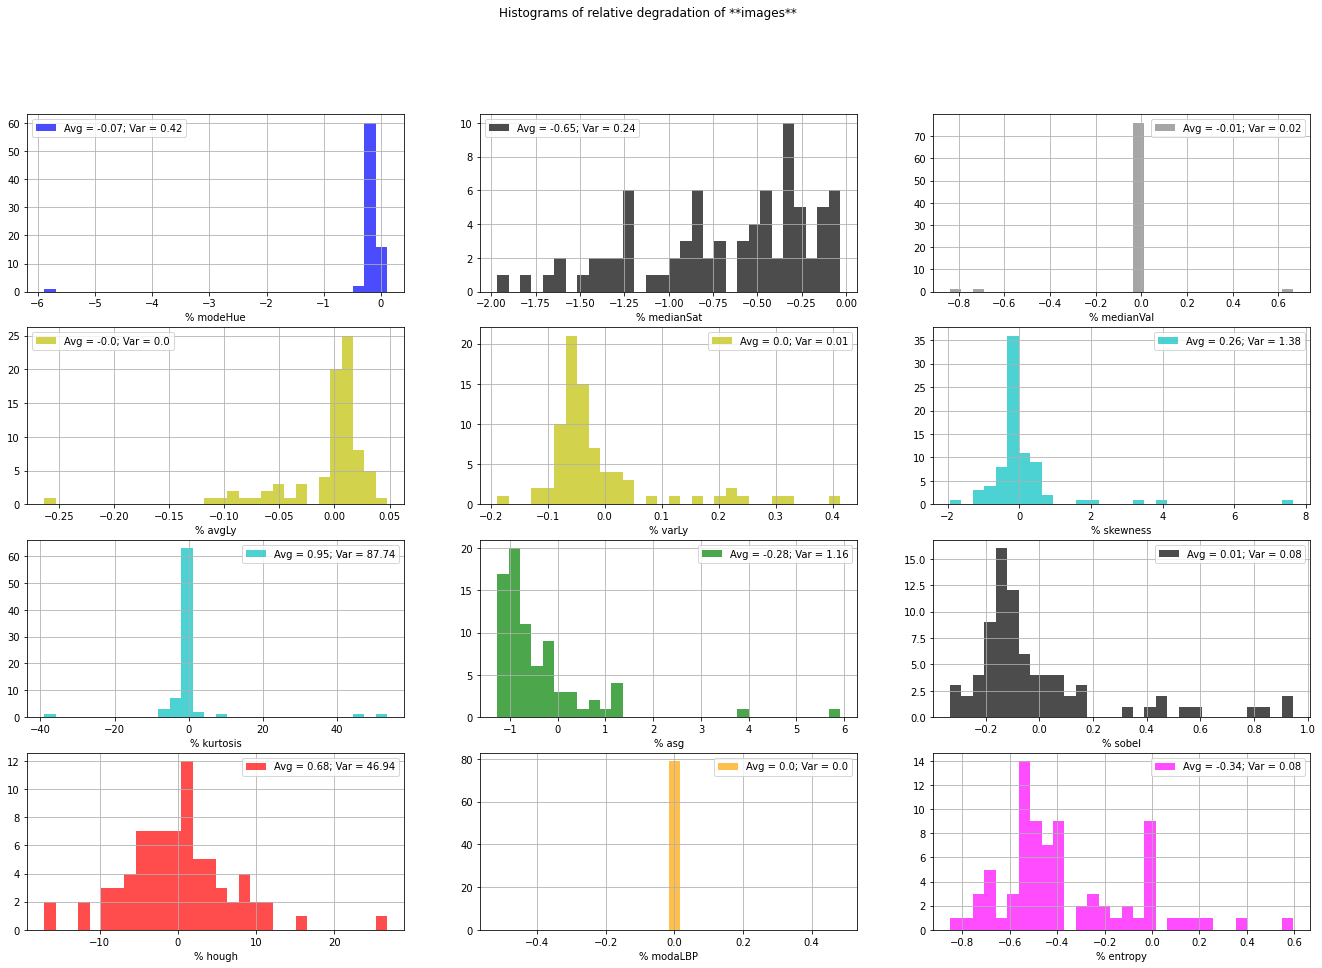

In [22]:
# Evaluate the degradation of the images
degradation_images(summary_dict, join(hs, "deg_imgs.png"))

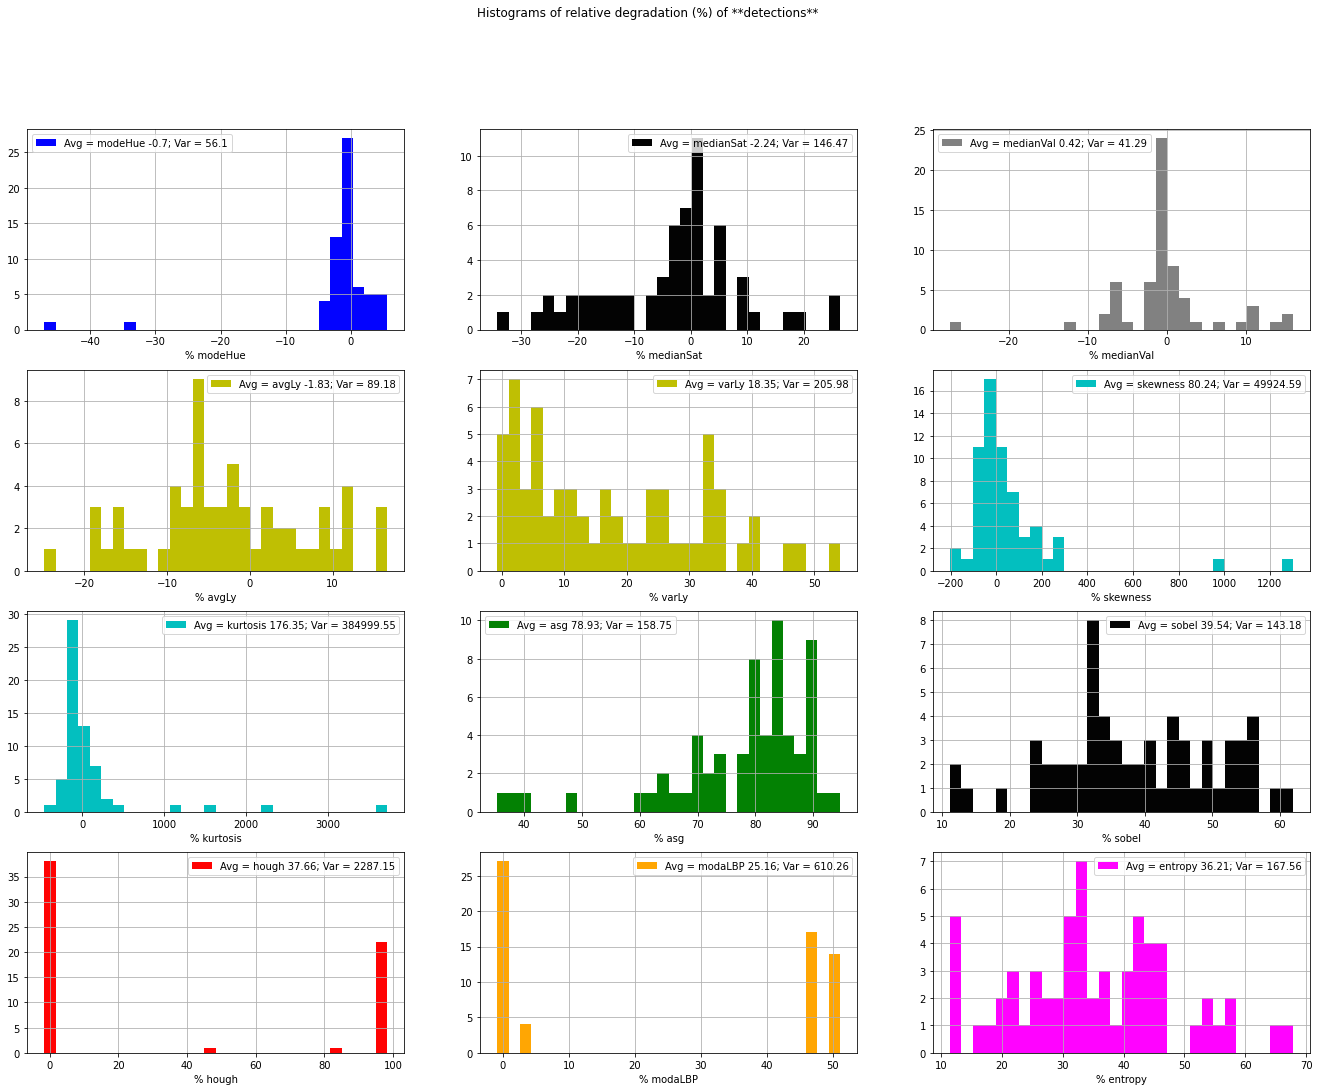

In [23]:
# Evaluate the degradation of the detections !!!!
dm = histogram_detections_deg(summary_dict, join(hs, "deg_detections.png"))
dm.corr().style.background_gradient(cmap='viridis').set_precision(2)

In [23]:
# Storing the quality parameters, detection and blurring performances and evaluations
df6 = pd.DataFrame.from_dict(summary_dict) 
df6.to_csv(store_summary_dict)        
rec_print(summary_dict,0)


folder_name : /home/asoria/Documents/proyecto_bretagne/port_kerity/sss/
n_imgs : 8
before
- inputs
- - images
- - - Image_000071.jpg
- - - - img_char
- - - - - modeHue : 152.625
- - - - - medianSat : 0.07024793388429751
- - - - - medianVal : 151.0
- - - - - avgLy : 118.30065056351857
- - - - - varLy : 1.7128716393627166
- - - - - skewness : -0.4899301087233068
- - - - - kurtosis : -0.7108961394242206
- - - - - asg : 6.883818315182028
- - - - - sobel : 95.19130979938272
- - - - - hough : 371
- - - - - modaLBP : 25
- - - - - entropy : 3.745406425938248
- - - - detections
- - - - - det1
- - - - - - coordis : [822, 467, 125, 42]
- - - - - - modeHue : 157.7222222222222
- - - - - - medianSat : 0.42067124332570555
- - - - - - medianVal : 75.0
- - - - - - avgLy : 45.388484663627516
- - - - - - varLy : 2.304560622606231
- - - - - - skewness : 0.39508409874717615
- - - - - - kurtosis : -1.2669456128860825
- - - - - - asg : 17.426754589861353
- - - - - - sobel : 98.16285714285715
- - - - - - houg

In [24]:
# Fill in the paths for 3D results evaluation
report_before_path = '/home/asoria/Documents/proyecto_bretagne/port_kerity/report_original.xml'
report_after_path = '/home/asoria/Documents/proyecto_bretagne/port_kerity/report_blurred.xml'
store_report_dict = r'/home/asoria/Documents/proyecto_bretagne/port_kerity/report_project.csv'

In [25]:
# Create the dictionary
report_dict = {}

report_dict['before'] = {}
report_dict['after'] = {}

report_dict['before']['Cloud4D'] = {}
report_dict['before']['Matic4D'] = {}
report_dict['before']['CCompare'] = {}

report_dict['after']['Cloud4D'] = {}
report_dict['after']['Matic4D'] = {}
report_dict['after']['CCompare'] = {}

# Define the parameters that ought to be found
params_cloud = ['n_calibrated', 'GSD', 'optim', '2D_BBA', '3D_BBA', 'keypoints_img', 'matches_img', 'mre']
params_matic = ['MTP1', 'MTP2', 'MTP3', 'MTP4']
params_cc = ['RMS_register', 'avg_dist', 'sigma']


In [26]:
# Retrieve the results from xml files
results_before_cloud = get_xml_thingies(report_before_path)
print('DONE report before path')
results_after_cloud = get_xml_thingies(report_after_path)
print('DONE results after path')

DONE report before path
DONE results after path


In [27]:
# Fill the 3D results dictionary
n = 0
for x in params_cloud:
    report_dict['before']['Cloud4D'][x] = results_before_cloud[n]
    report_dict['after']['Cloud4D'][x] = results_after_cloud[n]
    n+=1

for x in params_matic:
    report_dict['before']['Matic4D'][x] = input(x+' before:')
    report_dict['after']['Matic4D'][x] = input(x+' after:')

for x in params_cc:
    report_dict['before']['CCompare'] [x] = input(x+' before:')
    report_dict['after']['CCompare'] [x] = input(x+' after:')    

                before    after  degradation_perc
n_calibrated       738      780         -5.691057
optim             0.47    14.56      -2997.872340
2D_BBA         3177298  8417417       -164.923750
3D_BBA         1161222  2979183       -156.555852
keypoints_img    24742    23755          3.989168
matches_img       4082    10839       -165.531602
mre             0.2178   0.3506        -60.973370


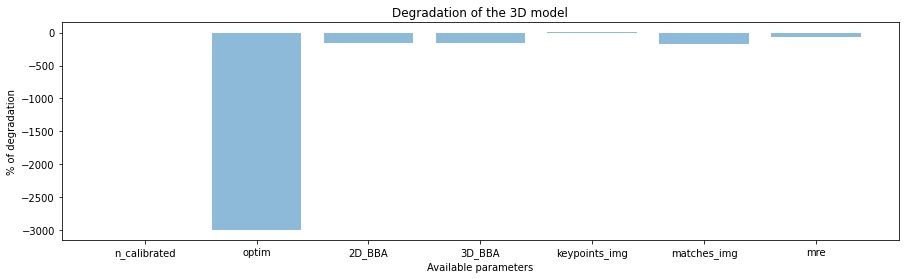

In [28]:
# Analyze the 3D parameters
results_3d(report_dict, join(hs, "results_3d.png"))

In [29]:
# Store the csv with 3D results
df2 = pd.DataFrame.from_dict(report_dict) 
df2.to_csv(store_report_dict)        
rec_print(report_dict,0)

before
- Cloud4D
- - n_calibrated : 738
- - GSD : 0.489377265519586
- - optim : 0.47
- - 2D_BBA : 3177298
- - 3D_BBA : 1161222
- - keypoints_img : 24742
- - matches_img : 4082
- - mre : 0.2178
- Matic4D
- - MTP1 : 
- - MTP2 : 
- - MTP3 : 
- - MTP4 : 
- CCompare
- - RMS_register : 
- - avg_dist : 
- - sigma : 
after
- Cloud4D
- - n_calibrated : 780
- - GSD : None
- - optim : 14.56
- - 2D_BBA : 8417417
- - 3D_BBA : 2979183
- - keypoints_img : 23755
- - matches_img : 10839
- - mre : 0.3506
- Matic4D
- - MTP1 : 
- - MTP2 : 
- - MTP3 : 
- - MTP4 : 
- CCompare
- - RMS_register : 
- - avg_dist : 
- - sigma : 
